In [3]:
import numpy as np
import torch
from skimage import transform
import matplotlib.pyplot as plt
import os
from torchvision import transforms
import cv2
import torchvision.transforms.functional as F

/home/milab/anaconda3/envs/danny_clone_LJH/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_dir = './datasets/cityspaces/train'
data_dir_a = data_dir +'A'
data_dir_b = data_dir +'B'

dataA = [f for f in os.listdir(data_dir_a) if f.endswith('.png')] # dir안에 모든 파일 중 jpg로 끝나는 모든 string을 list로 차곡차곡
dataA.sort()

dataB = [f for f in os.listdir(data_dir_b) if f.endswith('color.png')]
dataB.sort()

names = (dataA, dataB)

In [5]:
data_dir_b_list = [data_dir_b +'/'+ i for i in names[1]]

In [6]:
data_dir_b_list

['./datasets/cityspaces/trainB/aachen_000000_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000001_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000002_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000003_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000004_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000005_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000006_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000007_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000008_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000009_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000010_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000011_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000012_000019_gtFine_color.png',
 './datasets/cityspaces/trainB/aachen_000013_000019_gtFine_color.png',
 './da

In [7]:
transform_crop_pad = transforms.Compose([
    transforms.CenterCrop(size=(1004,2028)), # corner에 검정색 테두리 잘라내기
    transforms.Pad(padding=80,padding_mode='edge'),  # edge 색깔로 padding
])

transform_origin_crop = transforms.Compose([
    transforms.CenterCrop(size=(1024,2048)), # 원본 크기로 맞춰주기
])

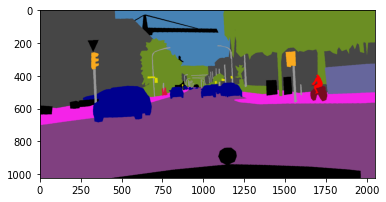

In [8]:
for index in range(len(names[1])):
# for index in range(1):

    dataB = plt.imread(data_dir_b_list[index]).squeeze()
    dataB = torch.from_numpy(dataB)
    dataB = dataB.permute(2,0,1) # (1024,2048,4) -> (4,1024,2048)
    ## transformation
    # 1. crop & pad
    dataB_tran = transform_crop_pad(dataB)
    # 2. rotate
    dataB_tran = F.rotate(dataB_tran,2)  # Rotation 각도 고정적으로 설정
    # 3. shift
    shift = 20
    matrix = torch.tensor([[1, 0, -shift],[0, 1, 0]])
    dataB_tran = F.affine(dataB_tran, angle=0, translate=[-shift, 0], scale=1, shear=0, resample=2)
    # 4.resize
    dataB_tran = transform_origin_crop(dataB_tran)
    
    dataB_tran = dataB_tran.permute(1,2,0)
    plt.imshow(dataB_tran)
    dataB_tran = dataB_tran.numpy()
    plt.imsave('./datasets/cityspaces/trainB_transform/' + names[1][index], dataB_tran[:,:,0:3])

In [ ]:
# num = 0
# for i in range(len(dataA)):
#     A = dataA[i][0:20]
#     B = dataB[i][0:20]
#     if A != B:
#         print(A,B)
#         num += 1
# print(num)